In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import numpy as np


In [40]:
#View Dataset
data = pd.read_csv('Crop_recommendation.csv')
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [41]:
#Filter Data and get the Maize, Banana, Coffee
filtered_data = data[data['label'].isin(['banana','coffee','maize'])]
filtered_data

,N,P,K,temperature,humidity,ph,rainfall,label
100,71,54,16,22.613600,63.690706,5.749914,87.759539,maize
101,61,44,17,26.100184,71.574769,6.931757,102.266244,maize
102,80,43,16,23.558821,71.593514,6.657965,66.719955,maize
103,73,58,21,19.972160,57.682729,6.596061,60.651715,maize
104,61,38,20,18.478913,62.695039,5.970458,65.438354,maize
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [42]:
#put in separate Variable
X = filtered_data[['N', 'P', 'K', 'temperature', 'humidity', 'rainfall']]
y = filtered_data[['label']]
print(X)
print(y)

        N   P   K  temperature   humidity    rainfall
100    71  54  16    22.613600  63.690706   87.759539
101    61  44  17    26.100184  71.574769  102.266244
102    80  43  16    23.558821  71.593514   66.719955
103    73  58  21    19.972160  57.682729   60.651715
104    61  38  20    18.478913  62.695039   65.438354
...   ...  ..  ..          ...        ...         ...
2195  107  34  32    26.774637  66.413269  177.774507
2196   99  15  27    27.417112  56.636362  127.924610
2197  118  33  30    24.131797  67.225123  173.322839
2198  117  32  34    26.272418  52.127394  127.175293
2199  104  18  30    23.603016  60.396475  140.937041

[300 rows x 6 columns]
       label
100    maize
101    maize
102    maize
103    maize
104    maize
...      ...
2195  coffee
2196  coffee
2197  coffee
2198  coffee
2199  coffee

[300 rows x 1 columns]


In [43]:
print(len(X)) 
print(len(y)) 

300
300


In [44]:
#Data Split for testing and Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)



In [45]:
model = RandomForestClassifier()

model.fit(X_train, y_train)


C:\Users\Dex\AppData\Local\Temp\ipykernel_12532\1875999260.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier()

In [46]:
print(X_test)
predictions = model.predict(X_test)
predictions

        N   P   K  temperature   humidity    rainfall
2111   85  33  25    26.208114  52.509880  189.094482
2197  118  33  30    24.131797  67.225123  173.322839
128    78  48  22    23.089749  63.104596   70.434736
2185  116  36  25    27.578476  58.525343  156.681037
1032  105  74  45    25.145176  81.382041  119.218154
1095  108  94  47    27.359116  84.546250   90.812505
172    86  37  16    20.517168  59.212355   67.610137
2139  113  21  33    26.022414  55.832890  176.902092
161    72  60  25    18.525108  69.027623   88.102344
198    83  58  23    19.742133  59.662631   65.508614
1098   82  75  55    27.345851  78.487383   92.155243
1009  105  77  52    29.162266  76.161516  100.007568
1064   92  85  51    29.221186  81.081836  108.861647
2108  118  18  32    27.649611  51.110440  122.839282
2143  113  33  34    26.003740  62.144510  153.477776
2190  103  40  30    27.309018  55.196224  141.483164
2189   99  16  30    23.526521  65.443409  186.172820
2119  100  32  26    25.2346

array(['coffee', 'coffee', 'maize', 'coffee', 'banana', 'banana', 'maize',
       'coffee', 'maize', 'maize', 'banana', 'banana', 'banana', 'coffee',
       'coffee', 'coffee', 'coffee', 'coffee', 'coffee', 'banana',
       'banana', 'maize', 'coffee', 'maize', 'maize', 'coffee', 'coffee',
       'banana', 'banana', 'maize'], dtype=object)

In [47]:
#recommend crop
new_data = pd.DataFrame([[8, 10, 8, 31, 50,1700]]) 
new_data.columns =['N','P', 'K', 'temerature','humidity', 'rainfall']
print(new_data)
print()
predicted_crop = model.predict(new_data)
print(f"Suggested crop: {predicted_crop}")

   N   P  K  temerature  humidity  rainfall
0  8  10  8          31        50      1700

Suggested crop: ['coffee']


C:\Users\Dex\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- temerature
Feature names seen at fit time, yet now missing:
- temperature

  warnings.warn(message, FutureWarning)


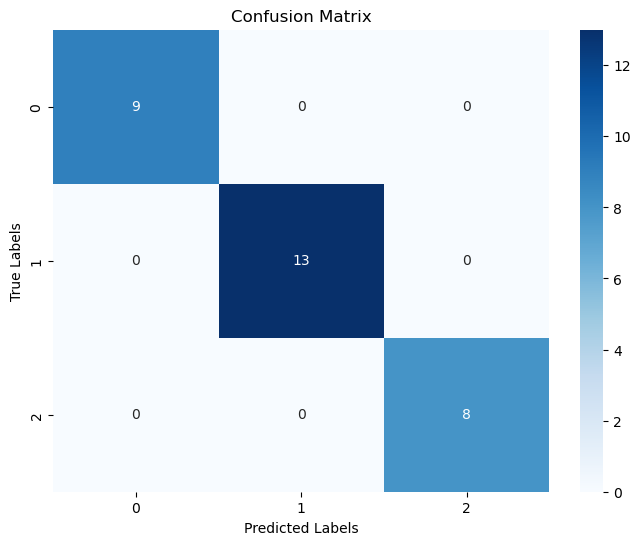

              precision    recall  f1-score   support

      banana       1.00      1.00      1.00         9
      coffee       1.00      1.00      1.00        13
       maize       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have predictions and true labels stored in variables
predictions = model.predict(X_test)
true_labels = y_test

# Generate confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(true_labels, predictions)
print(report)
